# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
twitter_archive= pd.read_csv("twitter-archive-enhanced.csv")
 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Make directory if it doesn't already exist
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#creating the request
url =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#check status
response

<Response [200]>

In [5]:
#write the tsv file into our new folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#Use read_csv toread as a pandas Dataframe(set seperator to [\t] since its a TSV file)
image_predictions=pd.read_csv("new_folder/image-predictions.tsv", sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#storing our keys and tokens in variables
consumer_key = 'yE5DGKB8RI90PJS4SvUq2ueeW'
consumer_secret = 'F2fuP4GxOgUqbnv4H5swzRWodxhx7epJXVuan7TxjVFtBXeNrG'
access_token = '4904439099-N5XF6sfXBt7ltZhWs6SVCJcO95z4MvGbKTifGws'
access_secret = 'wSLX2dxuwlODlvKd18P0fVrpJLfdUaD7VrtMlR7gXwJM0'

In [8]:
#setting up the API object
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
#storing our tweets IDs from the enganced_archive  in the Tweet_IDs variable
tweet_ids = twitter_archive.tweet_id.values
#check the length
len(tweet_ids)

2356

In [10]:
#remember to convert  next cell to code before submission(was converted to 
# to markdown because it overwrites the txt file everytime)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
     for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [11]:
#read into a pandas dataframe line by line using lines= true
tweet_ids = pd.read_json('tweet_json.txt', lines=True) 
tweet_ids.shape

(2326, 32)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter archive table

In [12]:
# Display the Twitter Archive table table
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
#checking for null tweet ids
sum(twitter_archive.tweet_id.isnull())

0

In [14]:
#checking for non-null retweet status id(to indicate its a retweet)
sum(twitter_archive.retweeted_status_id.notnull())

181

In [15]:
#checking for non-null in_reply_to_status_id id(to indicate its a reply)
sum(twitter_archive.in_reply_to_status_id.notnull())


78

In [16]:
#draw 50 samples for assessment
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1727,679877062409191424,NaN,NaN,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,None,None,None,None
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,None,None,None,None
862,762699858130116608,NaN,NaN,2016-08-08 17:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leela. She's a Fetty Woof. Lost eye wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
1622,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684914660...,12,10,None,None,None,None,None
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,None,None,None,None,None


In [17]:
#check for duplicate tweet entries using the tweets ID column
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
#check the info of the dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
#check description of the dataframe
twitter_archive.describe()  

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
#query for tweets beyond Aug. 1st 2017
twitter_archive.query("timestamp > '2017-08-01'")


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [21]:
#value counts of rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
#value counts of ratings denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Image prediction table

In [23]:
# Display the image predictions table
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
#draw 10 samples for assessment
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True
434,674372068062928900,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,1,seashore,0.346126,False,American_alligator,0.106404,False,sandbar,0.049349,False
1949,863062471531167744,https://pbs.twimg.com/media/C_o2vKCUwAAgtOp.jpg,2,French_bulldog,0.935804,True,pug,0.059576,True,boxer,0.001412,True
529,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,Chihuahua,0.440916,True,Pomeranian,0.345806,True,cocker_spaniel,0.060331,True
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,2,Labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,0.162022,False
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
288,671159727754231808,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True


In [25]:
#checking for null tweet ids
sum(image_predictions.tweet_id.isnull())

0

In [26]:
#check for duplicate predictions
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [27]:
#check info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
#get description
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
#query for non dog predictions
image_predictions.query("p1_dog== False & p2_dog== False &p3_dog == False ")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### Tweets ID Table

In [30]:
# Display the tweet IDs table
tweet_ids.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33835,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7015,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29348,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5302,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22069,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3484,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36960,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7229,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35338,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7768,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [31]:
#draw 10 samples for assessment
tweet_ids.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
718,NaN,NaN,2016-09-27 16:06:28,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 780800773873668096, 'id_str'...",5201,False,This is Koda. He has a weird relationship with...,NaN,...,NaN,NaN,NaN,NaN,1202,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1767,NaN,NaN,2015-12-17 01:35:24,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677301027595530240, 'id_str'...",1116,False,This is Juckson. He's totally on his way to a ...,NaN,...,NaN,NaN,NaN,NaN,355,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1896,NaN,NaN,2015-12-08 03:09:46,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674063277207457792, 'id_str'...",5743,False,This is Earl. Earl is lost. Someone help Earl....,NaN,...,NaN,NaN,NaN,NaN,1911,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
935,NaN,NaN,2016-07-06 15:54:42,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 750719617786609664, 'id_str'...",12282,False,This is Meyer. He has to hold somebody's hand ...,NaN,...,NaN,NaN,NaN,NaN,4596,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1388,NaN,NaN,2016-02-13 22:29:29,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698635005506015234, 'id_str'...",1198,False,Here we are witnessing five Guatemalan Birch F...,NaN,...,NaN,NaN,NaN,NaN,315,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1109,NaN,NaN,2016-05-05 02:21:37,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 728046957697052672, 'id_str'...",3950,False,This is Raymond. He controls fountains with hi...,NaN,...,NaN,NaN,NaN,NaN,1086,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2224,NaN,NaN,2015-11-20 19:12:01,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667782457777754112, 'id_str'...",363,False,Super rare dog. Endangered (?). Thinks it's fu...,NaN,...,NaN,NaN,NaN,NaN,210,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
695,NaN,NaN,2016-10-06 01:23:05,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 783839953138683904, 'id_str'...",28425,False,This is Riley. His owner put a donut pillow ar...,NaN,...,NaN,NaN,NaN,NaN,10062,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1469,NaN,NaN,2016-01-27 19:05:49,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1369,False,PUPDATE: just noticed this dog has some extra ...,NaN,...,NaN,NaN,NaN,NaN,198,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2275,NaN,NaN,2015-11-18 04:35:11,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666837024717058048, 'id_str'...",703,False,My goodness. Very rare dog here. Large. Tail d...,NaN,...,NaN,NaN,NaN,NaN,474,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [32]:
#check the tweet ID column
tweet_ids.id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: int64

In [33]:
#get info
tweet_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2326 non-null datetime64[ns]
display_text_range               2326 non-null object
entities                         2326 non-null object
extended_entities                2056 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null float64
id                               2326 non-null int64
id_str                           2326 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [34]:
sum(image_predictions.tweet_id.isnull())

0

In [35]:
#get value count for favorited column
tweet_ids.favorited.value_counts()

False    2326
Name: favorited, dtype: int64

### Quality issues

1. 181 non-null values in the retweet_id column indicating retweets on the tweet_archive table.

2. Timestamp is a string on the tweet_archive table.

3. 78 non-null values in the in_reply_to_status_id column indicating a reply tweets on the tweet_archive table.

4. Some ratings Denominators are invalid e.g 170 on the tweet_archive table.

5. Some ratings numerators are invalid eg 1,776 on the tweet_archive table.

6. non descript column name on the tweet IDs table.

7. 324 predictions that aren't dog breeds on the image prediction table.

8. Non descript column names on the image prediction table.

9. some tweets were beyond Aug. 1st 2017 on the twitter archove Table.


### Tidiness issues
1. The dog stage being stored with the texts in the text column of the twitter enhanced table.

2. Ratings is a single variable but it was spread into two columns on the twitter enhanced Table.

3. 29 columns on the tweets IDs table are not needed because some are repeated columns or they donot help the current analysis in any way.

4. 13 columns not neccesary on the archive table(including retweet counts because we wouldnt be making use of retweets for this analysis)

5. three predictions with different confidence levels on the image prediction table.

6.  Drop unneccesary columns on the image prediction table.

6. only one table is neccesary.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
twitter_archive2=twitter_archive.copy()
image_predictions2=image_predictions.copy()
tweets_ids2=tweet_ids.copy()

## Quality issues

###  1. 181 non-null values in the retweet_id column indicating retweets on the tweet_archive table.

#### Define:  drop all rows without null values in the retweet status id column.

#### Code

In [37]:
twitter_archive2=twitter_archive2[twitter_archive2.retweeted_status_id.isnull()]

#### Test

In [38]:
sum(twitter_archive2.retweeted_status_id.notnull())
 

0

### 2. Timestamp is a string on the tweet_archive table.

#### Define: change timestamp to datetime format

#### Code

In [39]:
twitter_archive2['timestamp'] = pd.to_datetime(twitter_archive2['timestamp'])

#### Test

In [40]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### 3. 78 non-null values in the in_reply_to_status_id column indicating a reply tweets on the tweet_archive table.

#### Define:  drop all rows without null values in the reply status id column.


**Code**

In [41]:
twitter_archive2=twitter_archive2[twitter_archive2.in_reply_to_status_id.isnull()]

**Test**

In [42]:
 sum(twitter_archive2.in_reply_to_status_id.notnull())

0

### 4. Some ratings Denominators are invalid e.g 170 on the tweet_archive table.


#### Define:  Drop all rows with rating denominators with 3 digits (>99)

**Code**

In [43]:
twitter_archive2=twitter_archive2.query('rating_denominator <=99')


**Test**

In [44]:
twitter_archive2.query('rating_denominator >99')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 5. Some ratings Numerators are invalid e.g 170 on the tweet_archive table.


#### Define:  Drop all rows with rating Numerators with 3 digits (>99)

**Code**

In [45]:
twitter_archive2=twitter_archive2.query('rating_numerator <=99')

 **Test**

In [46]:
twitter_archive2.query('rating_numerator >99')
 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 6. non descript column name on the tweet IDs table.


#### Define:   The favorite_count column should be renamed to like_count and ID should be changed to tweets ID

**Code**

In [47]:
tweets_ids2. rename(columns = {'favorite_count':'like_count', 'id':'tweet_id'}, inplace = True)

**Test**

In [48]:
tweets_ids2.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'like_count', 'favorited', 'full_text',
       'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

### 7. 324 predictions that aren't dog breeds on the image prediction table.


#### Define: Remove all predictions without atleast one dog breed prediction.

**Code**

In [49]:
image_predictions2=image_predictions2.query("p1_dog== True | p2_dog== True |p3_dog == True")

**Test**

In [50]:
image_predictions2.query("p1_dog== False & p2_dog== False &p3_dog == False ")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 8. Non descript column names on the image prediction table.


#### Define:   replace all "p" with prediction to add description

**Code**

In [51]:
image_predictions2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [52]:
image_predictions2 = image_predictions2.rename(columns=lambda x: re.sub('p','prediction',x))


In [53]:
image_predictions2.columns

Index(['tweet_id', 'jpredictiong_url', 'img_num', 'prediction1',
       'prediction1_conf', 'prediction1_dog', 'prediction2',
       'prediction2_conf', 'prediction2_dog', 'prediction3',
       'prediction3_conf', 'prediction3_dog'],
      dtype='object')

### 9. Tweets beyond Aug 1 2017 on the tweets ID table.

#### Define: drop all tweets beyond Aug. 1st 2017.

**Code**

In [54]:
twitter_archive2=twitter_archive2.query("timestamp < '2017-08-01'")


**Test**

In [55]:
twitter_archive2.query("timestamp > '2017-08-01'")


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Tidiness issues

###  1. The dog stage being stored with the texts in the text column.


#### Define:   Extract the dog stage from the text column  into a new "stage" column on the twitter_enhanced  table.

**Code**

In [56]:
twitter_archive2['stage']=twitter_archive2['text'].str.extract(r'(doggo|puppo|floofer|pupper)')

**Test**

In [57]:
twitter_archive2.stage.sample(10)

416        NaN
830        NaN
690        NaN
1879       NaN
2202       NaN
992      doggo
1600    pupper
2291       NaN
1792       NaN
280        NaN
Name: stage, dtype: object

### 2. Ratings is a single variable but it was spread into two columns on the twitter enhanced Table.


#### Define: divide the numerator rating by the denominator rating and store in a "ratings" column.

**Code**

In [58]:
twitter_archive2['ratings']= twitter_archive2['rating_numerator']/twitter_archive2['rating_denominator']

**Test**

In [59]:
twitter_archive2['ratings'].sample(3)

424     1.3
924     1.4
1366    1.0
Name: ratings, dtype: float64

###  3. 29 columns on the tweets IDs table are not needed because some are repeated columns or they donot help the current analysis in any way.

#### Define: drop all columns except tweet_ids, like_count and retweet_count.

**Code**

In [60]:
tweets_ids2 = tweets_ids2[["tweet_id","like_count","retweet_count"]]

**Test**

In [61]:
tweets_ids2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id         2326 non-null int64
like_count       2326 non-null int64
retweet_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### 4. 13 columns not neccesary on the archive table(including retweet/reply status id because we wouldnt be making use of retweets/replies rows for this analysis)


#### Define: drop all coumns except; tweet_id, timestamp, text, name, stage, ratings

**Code**

In [62]:
 twitter_archive2 = twitter_archive2[["tweet_id", 'timestamp', 'text', 'name', 'stage', 'ratings']]

**Test**

In [63]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 2 to 2355
Data columns (total 6 columns):
tweet_id     2089 non-null int64
timestamp    2089 non-null datetime64[ns]
text         2089 non-null object
name         2089 non-null object
stage        351 non-null object
ratings      2089 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 114.2+ KB


### 5. three predictions with different confidence levels on the image prediction table.



#### Define: write a function that select the breed prediction with the highest confidence level among all three predictions and drop the rest.

**Code**

In [64]:
 def highest_confidence(row):
        ''' 
        fuction that compares the three confidence levels and returns 
        the prediction with the highest confidence levels
        '''
        if row['prediction1_conf'] > row['prediction2_conf'] and row['prediction1_conf'] >row['prediction3_conf']:
            return row['prediction1']
        elif row['prediction2_conf'] > row['prediction1_conf'] and row['prediction2_conf'] >row['prediction3_conf']:
            return row['prediction2']
        else:
            return  row['prediction3']
image_predictions2["highest_conf_breed"] = image_predictions2.apply(highest_confidence, axis=1)

**Test**

In [65]:
image_predictions2.head()

,tweet_id,jpredictiong_url,img_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,highest_conf_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


### 6.  Drop unneccesary columns on the image prediction table.


#### Define: drop all other columns apart from tweet id and  highest conf breed 

**Code**

In [66]:
image_predictions2 = image_predictions2[["tweet_id", 'highest_conf_breed']]

**Test**

In [67]:
image_predictions2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id              1751 non-null int64
highest_conf_breed    1751 non-null object
dtypes: int64(1), object(1)
memory usage: 41.0+ KB


### 6. only one table is neccesary.

#### Define: merge  all three tables  using the tweets id column.

**Inspecting the three tables**

In [68]:
image_predictions2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id              1751 non-null int64
highest_conf_breed    1751 non-null object
dtypes: int64(1), object(1)
memory usage: 41.0+ KB


In [69]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 2 to 2355
Data columns (total 6 columns):
tweet_id     2089 non-null int64
timestamp    2089 non-null datetime64[ns]
text         2089 non-null object
name         2089 non-null object
stage        351 non-null object
ratings      2089 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 114.2+ KB


In [70]:
tweets_ids2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id         2326 non-null int64
like_count       2326 non-null int64
retweet_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


**Code**

In [71]:
#merge the first two
x_master=pd.merge(tweets_ids2, twitter_archive2, on="tweet_id")
#add the third
master=pd.merge(x_master, image_predictions2, on="tweet_id")

**Test**

In [72]:
master.sample(10)

,tweet_id,like_count,retweet_count,timestamp,text,name,stage,ratings,highest_conf_breed
700,739932936087216128,3764,988,2016-06-06 21:32:13,Say hello to Rorie. She's zen af. Just enjoyin...,Rorie,NaN,1.0,redbone
546,766069199026450432,3953,778,2016-08-18 00:28:24,This is Juno. She can see your future. 12/10 h...,Juno,NaN,1.2,redbone
790,719339463458033665,4117,1122,2016-04-11 01:41:07,Say hello to Lucy and Sophie. They think they'...,Lucy,NaN,1.0,golden_retriever
355,807106840509214720,111766,51728,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,Stephan,NaN,1.3,Chihuahua
1254,676811746707918848,1308,379,2015-12-15 17:11:09,Say hello to Penny &amp; Gizmo. They are pract...,Penny,NaN,0.9,Chihuahua
994,696713835009417216,2184,588,2016-02-08 15:14:57,This is Trevith. He's a Swiss Mountain Roadwoo...,Trevith,pupper,0.9,car_mirror
167,844973813909606400,13958,2864,2017-03-23 18:07:10,This is Brady. He's a recovering alcoholic. De...,Brady,NaN,1.2,Labrador_retriever
1266,676430933382295552,1267,302,2015-12-14 15:57:56,Meet Duke. He's an Urban Parmesan. They know h...,Duke,NaN,1.0,golden_retriever
1362,673583129559498752,1069,314,2015-12-06 19:21:47,This is Sandy. She loves her spot by the tree....,Sandy,NaN,1.1,Arctic_fox
350,808733504066486276,7517,2034,2016-12-13 18:01:07,Here's a pupper in a onesie. Quite pupset abou...,None,pupper,1.2,seat_belt


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
master.to_csv('twitter_archive_master.csv', index= False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**import the twitter_archive_master dataset**

In [74]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')

### Insights:


1. Are certain breeds associated with higher ratings?

2. Do higer ratings correspond with higher retweet and like counts?

3. What are the characteristics of posts with the least ratings?

#### 1. Are certain breeds associated with higher ratings?


In [75]:
sorted_breed=twitter_archive_master.groupby('highest_conf_breed')['ratings'].mean().sort_values(ascending=False)
sorted_breed.head(10)

highest_conf_breed
clumber             2.700000
military_uniform    1.400000
laptop              1.400000
upright             1.300000
paper_towel         1.300000
canoe               1.300000
syringe             1.300000
Arabian_camel       1.300000
Pomeranian          1.286842
Saluki              1.250000
Name: ratings, dtype: float64

#### 2. Do higer ratings correspond with higher retweet and like counts and vice versa?


 **Analyze this using quantiles**

75% and above.

In [76]:
highest=twitter_archive_master.query('ratings >= ratings.quantile(.75)')
 

In [77]:
highest.like_count.sum()

9362320

In [78]:
highest.like_count.mean()

14142.477341389727

In [79]:
highest.retweet_count.sum()

2546832

In [80]:
highest.retweet_count.mean()

3847.1782477341389

25% and below

In [81]:
least=twitter_archive_master.query('ratings <= ratings.quantile(.25)')
 

In [82]:
least.like_count.sum()

1931930

In [83]:
least.like_count.mean()

3032.8571428571427

In [84]:
least.retweet_count.sum()

641288

In [85]:
least.retweet_count.mean()

1006.7315541601256

#### 3. What are the characteristics of posts with the least ratings?

In [86]:
lowest=twitter_archive_master.query('ratings <= ratings.quantile(.10)')


In [87]:
lowest_breed=lowest.groupby('highest_conf_breed')['highest_conf_breed'].count().sort_values(ascending=False)
lowest_breed.head(10)

highest_conf_breed
Chihuahua             16
pug                   14
seat_belt              9
Labrador_retriever     8
golden_retriever       8
dalmatian              6
Italian_greyhound      6
French_bulldog         6
Pembroke               5
Shetland_sheepdog      5
Name: highest_conf_breed, dtype: int64

In [88]:
lowest_stage=lowest.groupby('stage')['stage'].count().sort_values(ascending=False)
lowest_stage.head()

stage
pupper    26
doggo      4
puppo      1
Name: stage, dtype: int64

In [89]:
lowest.retweet_count.mean()

820.45878136200713

In [90]:
lowest.like_count.mean()

2548.1111111111113

### Visualization

In [98]:
pie1=twitter_archive_master.groupby('stage')['like_count'].mean()
pie1.reset_index(name="s")

,stage,s
0,doggo,16251.559322
1,floofer,19575.000000
2,pupper,6483.184358
3,puppo,20404.500000


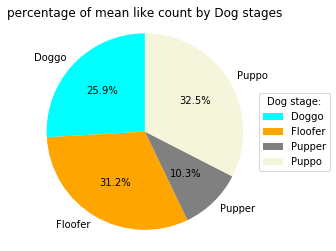

In [92]:
mylabels = ["Doggo", "Floofer", "Pupper", "Puppo"]
colors = ( "cyan","orange", "grey", "beige")

plt.pie(pie1, labels = mylabels,colors = colors,
                                  startangle = 90,
                                   autopct='%1.1f%%')
plt.legend(title = "Dog stage:",loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("percentage of mean like count by Dog stages")
plt.axis("square")
plt.show() 

In [93]:
pie2=twitter_archive_master.groupby('stage')['retweet_count'].mean()


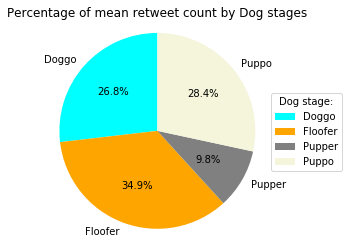

In [94]:

plt.pie(pie2, labels = mylabels,colors = colors,
                                  startangle = 90,
                                   autopct='%1.1f%%')
plt.legend(title = "Dog stage:",loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Percentage of mean retweet count by Dog stages") 
plt.axis("square")
plt.show() 
 

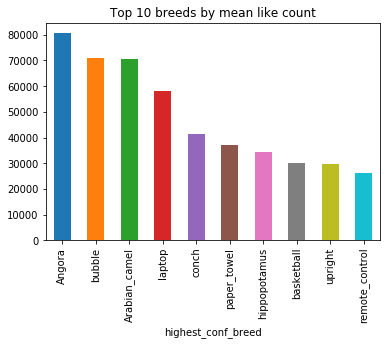

In [95]:
bar1=twitter_archive_master.groupby('highest_conf_breed')['like_count'].mean().nlargest(10)
bar1.plot(kind="bar", title="Top 10 breeds by mean like count");

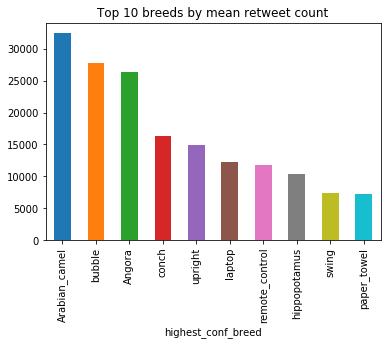

In [96]:
bar2=twitter_archive_master.groupby('highest_conf_breed')['retweet_count'].mean().nlargest(10)
bar2.plot(kind="bar", title="Top 10 breeds by mean retweet count");